<h2>Analysis of CIFAR10 dataset using CNN</h2>
<ul>
    <li>Training Accuracy : 73.68</li>
    <li>Test Accuracy : 68.87</li>
</ul>

In [36]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns


In [4]:
(xtrain, ytrain),(xtest, ytest) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [56]:
labelMap = {0: 'airplane',
           1: 'car',
           2: 'bird',
           3: 'cat',
           4: 'deer',
           5: 'dog',
           6: 'frog',
           7: 'horse',
           8: 'ship',
           9: 'truck'}

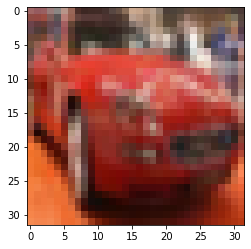

In [5]:
plt.imshow(xtrain[5])

In [6]:
ytrain_cat = to_categorical(ytrain, 10)
ytest_cat = to_categorical(ytest, 10)

In [7]:
print(xtrain.shape)
print(xtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.shape)
print(xtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
print(xtrain[0].max())
print(xtrain[0].min())
print(xtrain[0].mean())

1.0
0.0
0.40567555147058826


In [26]:
def cnnmodel():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape=(32,32,3), activation='relu'))
    model.add(MaxPool2D(pool_size = (4,4)))
    model.add(Conv2D(filters=64, kernel_size = (2,2), input_shape=(32,32,3), activation='relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

In [27]:
model = cnnmodel()
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [28]:
model.fit(xtrain, ytrain_cat, 
          validation_data=(xtest, ytest_cat), 
          callbacks=[early_stop], 
          verbose=1, 
          epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 180us/sample - loss: 1.5010 - accuracy: 0.4602 - val_loss: 1.2917 - val_accuracy: 0.5401
Epoch 2/10
50000/50000 [==============================] - 8s 163us/sample - loss: 1.1841 - accuracy: 0.5821 - val_loss: 1.1384 - val_accuracy: 0.6006
Epoch 3/10
50000/50000 [==============================] - 8s 167us/sample - loss: 1.0501 - accuracy: 0.6348 - val_loss: 1.0288 - val_accuracy: 0.6359
Epoch 4/10
50000/50000 [==============================] - 7s 149us/sample - loss: 0.9605 - accuracy: 0.6646 - val_loss: 0.9615 - val_accuracy: 0.6654
Epoch 5/10
50000/50000 [==============================] - 8s 151us/sample - loss: 0.8937 - accuracy: 0.6898 - val_loss: 0.9247 - val_accuracy: 0.6839
Epoch 6/10
50000/50000 [==============================] - 8s 153us/sample - loss: 0.8384 - accuracy: 0.7079 - val_loss: 0.9141 - val_accuracy: 0.6864
Epoch 7/10
50000/50000 [==========================

In [31]:
hist_df = pd.DataFrame(model.history.history)

In [32]:
display(hist_df.head())

,loss,accuracy,val_loss,val_accuracy
0,1.501006,0.46016,1.291709,0.5401
1,1.184072,0.58210,1.138448,0.6006
2,1.050107,0.63476,1.028840,0.6359
3,0.960514,0.66458,0.961518,0.6654
4,0.893708,0.68978,0.924686,0.6839


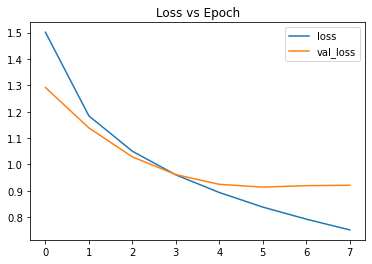

In [45]:
hist_df[['loss', 'val_loss']].plot(title='Loss vs Epoch')

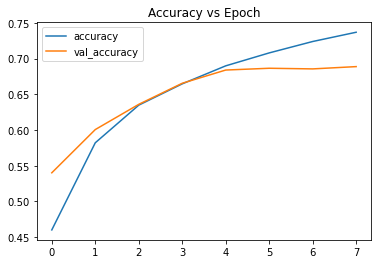

In [46]:
hist_df[['accuracy', 'val_accuracy']].plot(title='Accuracy vs Epoch')

In [38]:
pred = model.predict_classes(xtest)

In [40]:
print(pred.shape)
print(ytest.shape)

(10000,)
(10000, 1)


In [42]:
report = classification_report(ytest, pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.91      0.68      0.78      1000
           2       0.56      0.63      0.59      1000
           3       0.45      0.58      0.50      1000
           4       0.62      0.69      0.65      1000
           5       0.57      0.65      0.61      1000
           6       0.92      0.59      0.72      1000
           7       0.77      0.72      0.74      1000
           8       0.79      0.82      0.81      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



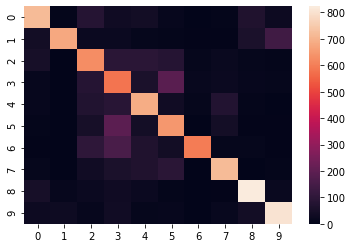

In [44]:
sns.heatmap(confusion_matrix(ytest, pred))

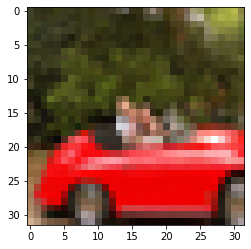

In [50]:
plt.imshow(xtrain[99])

In [57]:
print(labelMap[ytrain[99][0]])

car


In [58]:
pred_sample = model.predict_classes(xtrain[99].reshape(1,32,32,3))
print(labelMap[pred_sample[0]])

car
